# Assignment 4

## Support Vector Machines

### Problem 1: How do we formulate an SVM as a regularized loss function?
In this case, we will use a **Hinge Loss Function** which can be defined as:
$$l(a,b) = \max{(0, 1-ab)}$$

This loss function is **non-convex** and hard to optimize.

Looking at the graph, we can see that when ab<1, then hinge loss increases massively. 

We can find a classification function by solving a regularized learning problem:

\begin{align}
    \underset{f \in \mathbb{H}}{argmin} \frac{1}{n} \sum_{i=1}^{n} V(y_i, f(x_i) + \lambda ||f||^2_{\mathbb{H}})
\end{align}

**Note**: this class considers Binary Classification

We then consider the loss function

$$ V(f(x,y)) \equiv (1 - y f(x))_+$$

where

$$ (k)_+ \equiv max(k,0) $$

We substitute in the loss function in order to obtain 

\begin{align}
    \underset{f \in \mathbb{H}}{argmin} \frac{1}{n} \sum_{i=1}^{n} (1 - y_i f(x_i))_+ + \lambda ||f||^2_{\mathbb{H}}
\end{align}

There is a kink in the function so this is non-differentiable. Can rewrite the optimization problem using slack variables.

\begin{align}
    \underset{f \in \mathbb{H}}{argmin} \frac{1}{n} \sum_{i=1}^{n}  \zeta_i + \lambda ||f||^2_{\mathbb{H}}
\end{align}

subject to:
\begin{align}
\zeta_i \geq 1 - y_i f(x_i) \quad i = 1, \dots, n \\
\zeta_i \geq 0 \quad i = 1, \dots, n
\end{align}

We need something called **Representer Theorem**. This tells us that the solutions to some regularization functionals in high or infinite dimensional spaces lie in finite dimensional subspaces spanned by the representers of the data. Can reduce the computationally cumbersome or infeasible problems in HD spaces to optimization problems on the scalar co-efficients. In this case we substitute in 

$$f^*(x) = \sum_{i=1}^n c_i K(x, x_i)$$

To obtain a constrained quadratic programming problem

\begin{align}
    \underset{c \in \mathbb{R}^n, \zeta \in \mathbb{R}^n}{argmin} \frac{1}{n} \sum_{i=1}^{n} \zeta_i + \lambda c^T \mathbf{K}c
\end{align}

subject to: \begin{align}\zeta_i \geq 1 - y_i \sum_{j=1}^n c_j K(x_i, x_j) \quad i = 1, \dots, n \\
\zeta_i \geq 0 \quad i = 1, \dots, n \end{align}

Adding an unregularized bias term in order to obtain the **primal** SVM (primal refers to the form of SVM. This is preferred when we don't need to apply the kernel trick to the data and the data set is large but the dimensions of each data point is small. Dual form is preferred when data has huge dimension (many features) and we need to apply kernel techniques.)

\begin{align}
    \underset{c \in \mathbb{R}^n, b \in \mathbb{R}, \zeta \in \mathbb{R}^n}{argmin} \frac{1}{n} \sum_{i=1}^{n} \zeta_i + \lambda c^T \mathbf{K}c
\end{align}

subject to: \begin{align}\zeta_i \geq 1 - y_i (\sum_{j=1}^n c_j K(x_i, x_j) + b) \quad i = 1, \dots, n \\
\zeta_i \geq 0 \quad i = 1, \dots, n \end{align}

Standard Notation:
We use a parameter C to control regularization instead of $\lambda$

$$C = \frac{1}{2\lambda n} $$

The regularization problem then becomes

\begin{align}
    \underset{f \in \mathbb{H}}{argmin} C \sum_{i=1}^{n} V(y_i, f(x_i) + \frac{1}{2}||f||^2_{\mathbb{H}})
\end{align}

Like $\lambda$, the parameter C also controls the tradeoff between classification accuracy and the norm of the function. Primal problem then becomes:

\begin{align}
    \underset{c \in \mathbb{R}^n, b \in \mathbb{R}, \zeta \in \mathbb{R}^n}{argmin} C \sum_{i=1}^{n} \zeta_i + \frac{1}{2} c^T \mathbf{K}c
\end{align}

subject to: \begin{align}\zeta_i \geq 1 - y_i (\sum_{j=1}^n c_j K(x_i, x_j) + b) \quad i = 1, \dots, n \\
\zeta_i \geq 0 \quad i = 1, \dots, n \end{align}

This is a constrained optimization problem. We can then calculate the Lagrangian in order to optimize this.

**Conclusion**

Dual variables are then associated to each primal constraint. The basic idea is then to solve the dual problem to find optimal $\alpha$'s and use them to find b and c. $\alpha$ tells us:
- c and b
- the identities of the misclassified points

Hence, SVM is a regularization problem using the hinge loss

\begin{align}
    \underset{f \in \mathbb{H}}{argmin} \frac{1}{n} \sum_{i=1}^{n} (1 - y_i f(x_i))_+ + \lambda ||f||^2_{\mathbb{H}}
\end{align}

- Solving SVM means solving the constrained quadratic program
- Solutions can be *sparse*, some coefficients are zero
- nonzero coefficients correspond to the points that aren't classified correctly enough. 
- values for C determine how many outliers are incorporated into the SVM. 

In [1]:
!pip install mathjax

### Problem 2: How do we use Platt scaling to obtain probabilities from an SVM?

Firstly,  what is **Platt Scaling** (Platt 1999)?
This is a way of transforming the outputs of a classification model into a probability distribution over classes. One simply fits a univariate logistic regression for the purpose to predict outputs. The predicted scores are then used as the unput to the logistic regression model, and the corresponding labels are used as the truth.

In all, if we care about the predicted scores and intend to use the scores as probabilities, calibration such as **Platt Scaling** should be used. We use logistic regression on the SVM scores by fitting an additional cross-validation to the training set.

This would **not** change the ordering - would not affect the bias/variance. Thi would give it a different interpretation into a probability

### Problem 3: Three different ways to extend SVMs with more than two classes. 
This is then the multiclass problem in Machine Learning. I will discuss three types of multiclass extensions for SVMs. 

- One vs All (OVA) classifier
- One vs One (OVO)
- Multi-Class SVM (Crammer and Singer 2002)

In this case, we will be using an OVA classifier for the remainder of the assignment. But first we can discuss the three different multiclass approaches:

#### One-vs-All
We fit K SVMs, each time comparing one of the K classes to the remaining K-1 classes. We assign the observation to the class for which the parameters are the largest, as this amounts to a high level of confidence that the test observation belongs to the kth class rather than to any of the other classes.

One binary classification problem per class. The problem is that you always have an imbalanced data set.

#### One-vs-One
We construct K choose 2 SVMs, each of which compares a pair of classes. We classify a test observation using each of the (k 2) classifiers, and tally the number of times tht the test observation is assigned to each K classes. Final clssification is performed by assignng the test observation to the class to which it was most frequently assigned in these (k 2) pairwise classifications. 

One binary classification problem per each pair of classes. This ignores the other classes. If you have a lot of classes, this would be computationally expensive.

#### mSVM
Firstly need to consider the margin in multiclass problems. In order to optimize this, we need to consider this as a constrained optimization problem with quadratic objective function. This notion of margin can be obtained through a direct method for training multiclass predictors. This technique doesn't require us to hot-encode!

Using the dual of the optimization problem, are able to incorporate kernels with a compact set of constraints and decompose the dual problem into multiple optimization problems of reduced size. 

#### Directed Acyclic Graph SVM (DAG-SVM)
iterated elimination of clases. Starts with OVO classifier. N classes means N-1 SVM classifiers are evaluated from possible. When does the order matter? Does it matter to choose the largest first? Or one that explains the most variance?


### Problem 4: Research how to draw a ROC curve for the multiclass problem

Brief Review: What is an **ROC curve**? Most generally, provides a simple way to summarize all the information your model provides. X-axis holds false positives, and Y-axis holds true positives. Theoretically, you want to be further up and left.

For the multiclass problem: it is necessary to binarize the output. one ROC curve can be drawn per label, but one can also draw a ROC curve by considering each element of the label indicator matrix as a binary prediction (micro-averaging). 

If you are at a point in the ROC curve, it doesn't matter whether you have ordinal data. Can be used to compare how often your true positive ratio is correct for a specific point - done for random variables. For multiclass SVM, we would do one vs all in order to plot the ROC curve.

### Problem 5: Use scenarios 2 of ESL II as a multi-class problem
First, we need to upload the required items and change the Y variable into a multiclass problem

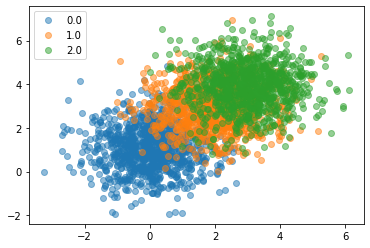

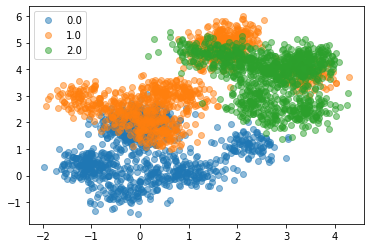

In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt
import sklearn
import seaborn as sns

import matplotlib.image as pltimg
# matplotlib.use('TkAgg')  # to open pictures in new window, currently saving them
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split # split the data into training and testing
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # creates support vector machine for classification
from sklearn.model_selection import GridSearchCV # cross validation
from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
###########################################

mu1 = [0,1]
mu2 = [2,3]
mu3 = [3,4]
n_data_points = 1000
plot_graphs = 1

np.random.seed(42)
xa = np.random.multivariate_normal(mu1, np.eye(2), n_data_points)
ya = np.zeros(n_data_points)

xb = np.random.multivariate_normal(mu2, np.eye(2), n_data_points)
yb = np.ones(n_data_points)

xc = np.random.multivariate_normal(mu3, np.eye(2), n_data_points)
yc = [yb+1 for yb in yb]

data_x = np.concatenate((xa, xb, xc))
data_y = np.concatenate((ya, yb, yc)).reshape(-1, 1)

data_scenario1 = pd.DataFrame(data=np.concatenate((data_x, data_y), 1), columns=['X1', 'X2', 'Y'])

groups = data_scenario1.groupby('Y')

if plot_graphs == 1:
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group['X1'], group['X2'], marker='o', linestyle='', alpha=.5, label=name)
    ax.legend(loc="upper left")
    plt.savefig("Scenario1.png")
    plt.show()
    
###########################################

n_groups = 10
X2 = np.empty((0, 2))
mean_all = np.random.multivariate_normal(mu1, np.eye(2), n_groups)
for mu in mean_all:
    X2 = np.vstack(
        [X2, np.random.multivariate_normal(mu, 0.1 * np.eye(2), int(round(n_data_points / 10)))])

mean_all = np.random.multivariate_normal(mu2, np.eye(2), n_groups)
for mu in mean_all:
    X2 = np.vstack(
        [X2, np.random.multivariate_normal(mu, 0.1 * np.eye(2), int(round(n_data_points / 10)))])

mean_all = np.random.multivariate_normal(mu3, np.eye(2), n_groups)
for mu in mean_all:
    X2 = np.vstack(
        [X2, np.random.multivariate_normal(mu, 0.1 * np.eye(2), int(round(n_data_points / 10)))])
    
data_scenario2 = pd.DataFrame(data=np.concatenate((X2, data_y), 1), columns=['X1', 'X2', 'Y'])

groups = data_scenario2.groupby('Y')

if plot_graphs == 1:
    fig, ax = plt.subplots()
    for name, group in groups:
        ax.plot(group['X1'], group['X2'], marker='o', linestyle='', alpha=.5, label=name)
    ax.legend(loc="upper left")
    plt.savefig("Scenario2.png")
    plt.show()


We will only focus on `data_scenario2` for this exercise.

#### Splitting into Dependent and Independent variables:

In [3]:
X = data_scenario2.drop('Y', axis=1).copy()
X.head()

,X1,X2
0,-1.035198,0.495316
1,-0.325984,0.282068
2,-1.214566,0.405935
3,-0.775238,-0.107339
4,-1.735645,0.183407


In [4]:
y = data_scenario2['Y'].copy()
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Y, dtype: float64

Lets perform cross validation in order to avoid **Data Leakage**. This occurs when information about the training data set corrupts or influences the testing data set.

#### Building the SVM


The **Radial Basis Function** that we will use with our SVM assumes that the data are centered and scaled. In other words, each column should have mean = 0 and std. dev = 1. We need to do this to both the training and testing data sets.

**NOTE**: we split the data into training and testing and then scale them separately in order to avoid **DATA LEAKAGE**.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

In [6]:
clf_svm = SVC(kernel='linear', random_state=42)
clf_svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

Ok we've built an SVM for classification. Lets see how it performs on the **Testing Dataset** and draw the confusion matrix

In [7]:
y_pred = clf_svm.predict(X_test_scaled)
print(f'SVM obtains an accuracy of {accuracy_score(y_test, y_pred).round(3)} for the given data set')

SVM obtains an accuracy of 0.803 for the given data set


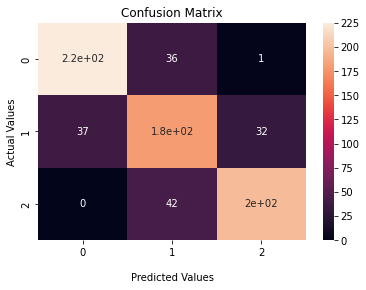

In [8]:
cf_matrix = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(cf_matrix, annot=True)

ax.set_title('Confusion Matrix');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

ax.xaxis.set_ticklabels(['0','1', '2'])
ax.yaxis.set_ticklabels(['0','1', '2'])

## Display the visualization of the Confusion Matrix.


plt.show()


Create the meshgrid for plotting

In [9]:
xx, yy = np.meshgrid(
    np.arange(X2[:, 0].min() - 1, X2[:, 0].max() + 1, 0.5),
    np.arange(X2[:, 1].min() - 1, X2[:, 1].max() + 1, 0.5))
Z = clf_svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

Now we actually plot the thing

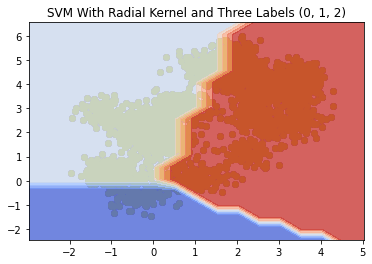

In [10]:
plt.scatter(X2[:,0], X2[:, 1], color='r')
plt.scatter(X2[:,0], X2[:, 1], color='b')
plt.scatter(X2[:,0], X2[:, 1], color='y')
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.title("SVM With Radial Kernel and Three Labels (0, 1, 2)")
plt.show()

### Problem 6: Relation between SVM and LDA/FDA

Firstly, what is Linear Discriminant analysis (LDA)?
Say we have some overlap with our data. Linear Discriminant Analysis focuses on *maximizing* separability among known categories. This is also considered a **dimensionality reduction technique**.

LDA uses information from both the features to create a new axis which in turn minimizes the variance and maximizes the class distance of the two variables.

#### The difference between SVM and LDA?
They both seem to arrive to similar ideas. The biggest difference seems to be that LDA assumes that data is Normally Distributed. LDA is one of the best discriminators in the case where all assumptions are satisfied due to its simplicity in decision rules, low dimensional views on the data, and low variance.

LDA performs poorly in cases of nonlinear decision boundaries (fixed with QDA), assumptions with regard to the single prototype (class centroid) is insufficient, and correlated predictors.

SVM is an optimization problem while LDA has an analytical solution. SVM can make use of kernels in order to transform SVM classifier from linear to non-linear classification. LDA can also make use of kernel - could then be used as FDA

LDA makes use of the *entire* data set (somewhat prone to outliers). SVM is best used through a subset of the dataset.



### Problem 7: How can SVM be used for regression problems?

Following section 12.3.6 of ESL:
Have the regression model 
$$f(x) = x' \beta + \beta_0$$

We estimate $\beta$ by minimizing

$$H(\beta, \beta_0) = \sum_{i = 1}^N V(y_i - f(x_i)) + \frac{\lambda}{2} ||\beta||^2$$

where

V_e(r) = 
        \begin{array}{ll}
            0 & \quad if |r| < 0 \\
            |r| - \epsilon & \quad otherwise
        \end{array}

"error insensitive"

Solution function has the form 

$$\hat{\beta} = \sum_{i=1}^N (\hat{\alpha}_i^* - \hat{\alpha}_i)x_i$$

$$\hat{f}(x) = \sum_{i=1}^N(\hat{\alpha}_i^* - \hat{\alpha}_i)<x,x_i> + \beta_0$$

Due to the nature of the constraints, typically only a subset of the solution values $(\hat{\alpha}_i^* - \hat{\alpha}_i)$ are nonzero, and the associated data values are called support vectors. 

In simple regression, the idea is to minimize the error rate while in SVR the idea is to fit the error inside a certain threshold which means, work of SVR is to approximate the best value within a given margin called ε- tube.

### Problem 8: Perform an analysis for the Spam data set using SVM and logistic regressions

We will implement an SVM then perform logistic regression in order to transform the outputs into a probability scaling. We will begin by applying the SVM

First we load the dataset

In [11]:
df = pd.read_csv('spam.csv')
df.head()

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,spam
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,spam
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,spam
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,spam
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,spam


What we will also do is replace the "type" column with binary variables. 1 will indicate spam and 0 will indicate not spam.

In [12]:
df_encoded = pd.get_dummies(df, columns = ['type'])
df_encoded.drop('type_spam', axis=1, inplace=True)
df_encoded.head()

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type_nonspam
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,0
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,0
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,0
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,0
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,0


We will also split the data into independent and dependent variables. 

In [13]:
X_spam = df_encoded.drop('type_nonspam', axis=1).copy() 
X_spam.head()

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,conference,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [14]:
y_spam = df_encoded['type_nonspam'].copy()
y_spam.head()

0    0
1    0
2    0
3    0
4    0
Name: type_nonspam, dtype: uint8

We split into a training and testing and then scale in order to use the rbf kernel

In [15]:
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(X_spam, y_spam, random_state=42)
X_train_scaled_spam = scale(X_train_spam)
X_test_scaled_spam = scale(X_test_spam)

In [16]:
clf_svm_spam = SVC(kernel = 'rbf', random_state=42)
clf_svm_spam.fit(X_train_scaled_spam, y_train_spam)

SVC(random_state=42)

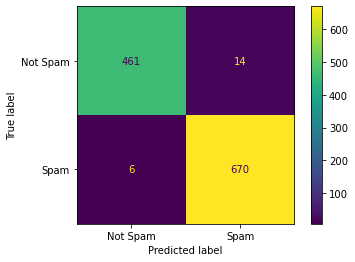

In [22]:
plot_confusion_matrix(clf_svm_spam,
                     X_test_scaled_spam,
                     y_test_spam,
                     values_format='d',
                     display_labels=['Not Spam', 'Spam'])

In [20]:
y_pred_spam = clf_svm_spam.predict(X_test_scaled_spam)
print(f'SVM obtains an accuracy of {accuracy_score(y_test_spam, y_pred_spam).round(3)} for the given data set')

SVM obtains an accuracy of 0.983 for the given data set


Now we can fit this to a logistic regression in order to obtain probabilities from the SVM. We will use **Platt Scaling**. 

### Problem 9: How would we use SHAP in order to describe the SVM?
How do we define **SHAP**? There is typically a tradeoff between *accuracy* and *interpretability* when dealing with machine learning models. SHAP assigns each feature an importance value for a particular prediction. Its novel components include:
- the identification of a new class of additive feature importance measures
- theoretical results showing there is a unique solution in this class with a set of desirable properties

In other words, we have a *global interpretability* and a *local interpretability*. Global interpretability can show how much each predictor contributes, either positively or negatively, to the target variable. Local interpretability gives each observation a SHAP value which would theoretically increase its transparancy.

In [ ]:
!pip install shap

In [23]:
import shap

In [50]:
fast_sample = shap.sample(X_train_scaled_spam, 100)

In [51]:
explainer = shap.KernelExplainer(clf_svm_spam.predict, fast_sample)

In [52]:
shap_values = explainer(X_train_scaled_spam)

AttributeError: 'Kernel' object has no attribute 'masker'